# Data Mining Approach to Predict  Telemarketing Campaign Result

## About Data
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.  

### Attribute Information
**Related with customers**   
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed", "services", "student", "technician", "unemployed","unknown")  
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")  
   5 - default: has credit in default? (categorical: "no","yes","unknown")  
   6 - housing: has housing loan? (categorical: "no","yes","unknown")  
   7 - loan: has personal loan? (categorical: "no","yes","unknown")  
**related with the last contact of the current campaign:**    
   8 - contact: contact communication type (categorical: "cellular","telephone")   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - duration: last contact duration, in seconds (numeric).  
**other attributes:**    
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
**social and economic context attributes**    
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)       
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)       
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
  20 - nr.employed: number of employees - quarterly indicator (numeric)  

**Output variable (desired target):**    
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")  
  
### Goal
Increase the effectiveness of the bank's telemarketing campaign
1. develop understanding of the target customers, establish customer profile
2. predict customers' response to telemarketing campaign

 ## Data Overview & Cleaning


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df=pd.read_csv(r"C:\Users\chuny\Desktop\bank-additional-full.csv",sep=";")
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# quick peek at the data and check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
# check missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# check and drop duplications
df.drop_duplicates( keep='last',inplace=True)
print(df.shape)

(41176, 21)


In [6]:
# drop unrelated attribute "contact", and attribute would lead potential data leakage: "duration"
df=df.drop(["duration","contact"],axis=1)
print(df.shape)

(41176, 19)


In [7]:
# check data distribution for customer related variables
print(df["job"].value_counts())
print("*"*25)
print(df["marital"].value_counts())
print("*"*25)
print(df["education"].value_counts())
print("*"*25)
print(df["housing"].value_counts())
print("*"*25)
print(df["loan"].value_counts())
print("*"*25)
print(df["default"].value_counts())

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
*************************
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
*************************
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
*************************
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64
*************************
no         33938
yes         6248
unknown      990
Name: loan, dtype: int64
*************************
no         32577
unknown     8596
yes            3
Na

In [8]:
#drop values with "unknown"

index = df[(df['job'] == 'unknown')| (df["marital"]=="unknown") |(df["education"]=="unknown")
           |(df['housing'] == 'unknown')| (df["loan"]=="unknown") |(df["default"]=="unknown")].index

df.drop(index,inplace=True)
print(df.shape)

(30478, 19)


In [9]:
# change column name, and values
df.rename(index=str, columns={'y': 'response'}, inplace = True)

# replace categorical value to numeric
df["month"].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb','mar', 'apr', 'sep'] ,[5, 6, 7, 8,10,11,12,1,2,3,4,9],inplace=True)
df["day_of_week"].replace(['mon', 'tue', 'wed', 'thu', 'fri'],[1,2,3,4,5],inplace=True)

# group education basic level toegther, and replace ordinal categorical value to numeric
df["education"].replace(['basic.9y', 'basic.6y', 'basic.4y'],["basic","basic","basic"],inplace=True)
df["education"].replace(["illiterate","basic","high.school","university.degree","professional.course"],[0,1,2,3,4],inplace=True)

## Exploratory Data Analysis

### Distribution of numeric data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

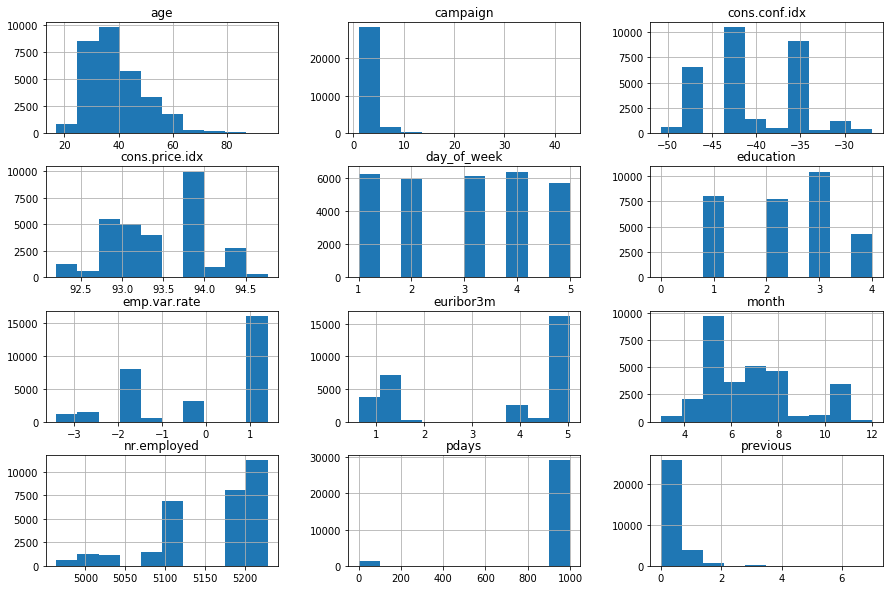

In [11]:
df.hist(figsize=(15,10))
plt.show()

insights:
1. Most of the customers that this campaign reached out are in the age range of 30-40.
2. The distribution of day_of_week is very average. 
3. Education level distribution seems normal. There are very few people that are illitrate.
4. There seems to have more contacts with customers in certain monthes (May, July)
5. pdays is the numer of days passed by after the client was last contacted from a previous campaign. 999 means client was not previously contected. Most of the customers are new to this campaign.
6. previous is the number of contacts perfromed before this campaign and for this client. It seems most of the clients had no previous contacts.


### Distribution of categorical data

In [12]:
# function to show distribution with percentage
def show_dist_col(column):
    chart=sns.countplot(df[column])
    chart.set_title("Distribution of "+column)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
    total=float(len(df[column]))
    for x in chart.patches:
        height=x.get_height()
        chart.text(x.get_x()+x.get_width()/2.,height+3,"{:1.2f}".format(height/total),ha="center")
    plt.show()

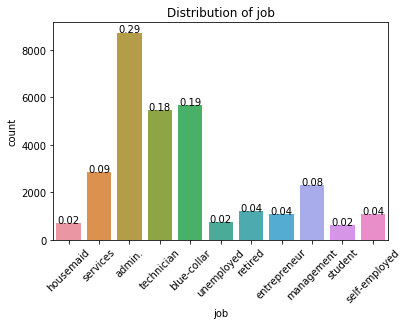

In [13]:
show_dist_col("job")

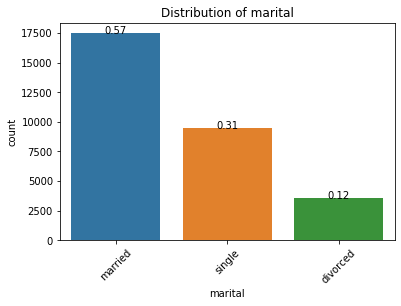

In [14]:
show_dist_col("marital")

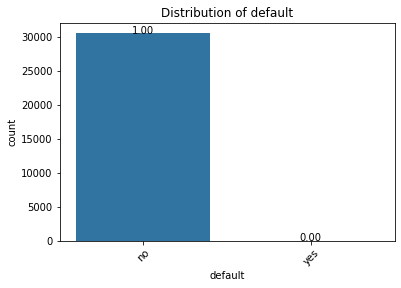

In [15]:
show_dist_col("default")

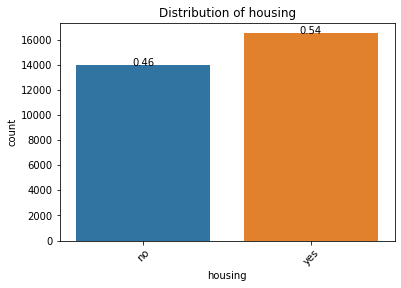

In [16]:
show_dist_col("housing")

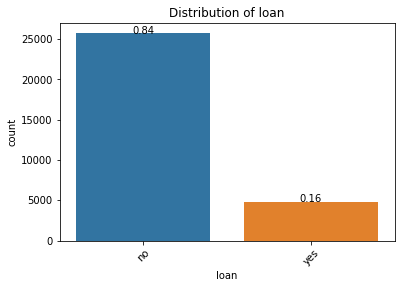

In [17]:
show_dist_col("loan")

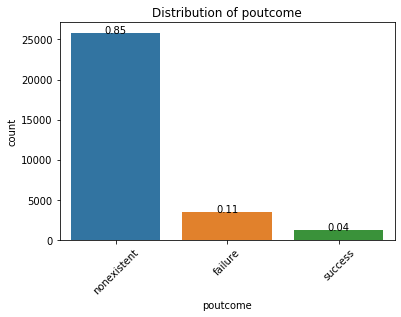

In [18]:
show_dist_col("poutcome")

insights:
1. Most of customers have jobs as admin, blue-collar and technician.
2. default variable contains very few records for category "Yes", maybe we could delete this feature.
3. Majority of customers have a housing loan.

In [19]:
print(df["default"].value_counts())

no     30475
yes        3
Name: default, dtype: int64


In [20]:
# drop attribute "default"
df.drop("default",axis=1,inplace=True)

### Visualization of the Subscription & Contact per age group

In [21]:
# create new age group
for column in [df]:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(df['response'],df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 
age = pd.DataFrame(df['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct["yes"]
age.drop('age_group',axis = 1,inplace = True)
df.drop('age_group',axis = 1,inplace = True)
age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

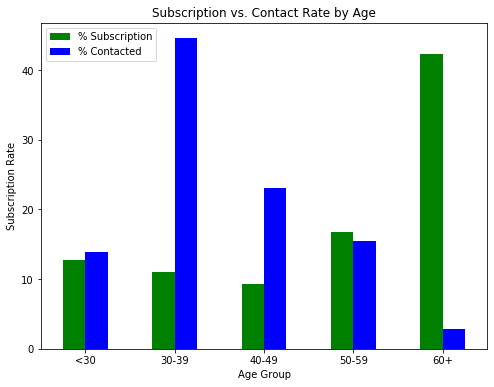

In [22]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','blue'))

plt.title('Subscription vs. Contact Rate by Age')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')

plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

plt.show()

insights: Target the youngest and the oldest group
1. Green bar indicates age group 60+ has the highest subscription rate.
2. However, blue bars show that the bank focused its marketing efforts on the middle-aged group.

### Visualization of the Subscription rate by job

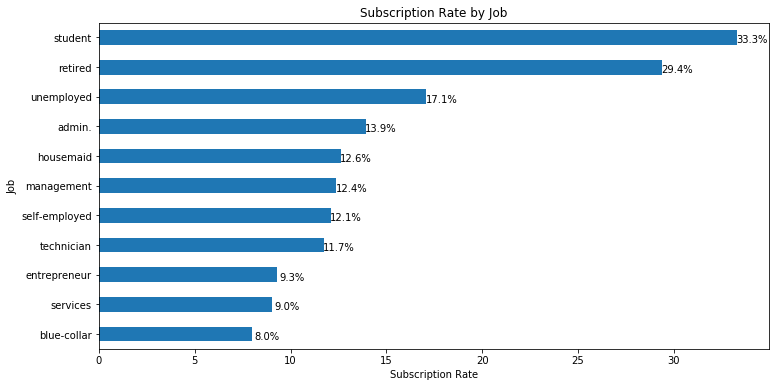

In [23]:
count_job_response_pct = pd.crosstab(df['response'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

plot_job = count_job_response_pct["yes"].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct["yes"].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

insights: Target the students and retired customer group  
consistent with the previous finding of higher subscription rates among the younger and older.

### Visualization of the Subscription rate by month

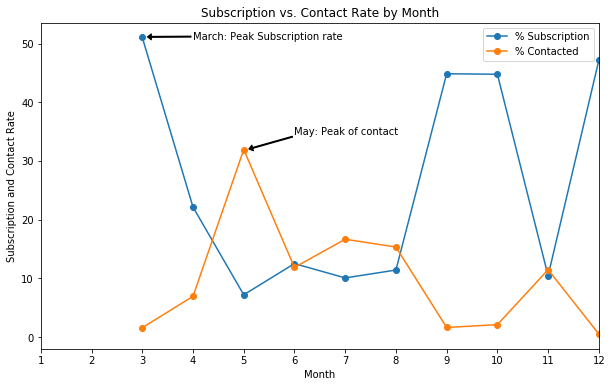

In [24]:
count_month_response_pct = pd.crosstab(df['response'],df['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response_pct["yes"]
month.drop('month',axis = 1,inplace = True)
month['Month'] = [5,7,8,6,11,4,10,9,3,12]
month = month.sort_values('Month',ascending = True)
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')
plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')
ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), 
             arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), 
             horizontalalignment='left', verticalalignment='top')
# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1),xytext=(x+1,y+1), 
             arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), 
             horizontalalignment='left', verticalalignment='top')

plt.show()

insights: call customers during spring and fall
1. bank contacted most clients during late spring and summer (may-aug)
2. however, subscription rate was higest during spring and fall

## Classification Model

### Data preprocessing

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [26]:
# we have already checked missing value, duplicated rows, did simple transformation for the dataframe
df.head()

,age,job,marital,education,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,1,no,no,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,2,yes,no,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,1,no,no,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,2,no,yes,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,4,no,no,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
# transform yes/no into 1/0
df_new=df
df_new["housing"]=df_new["housing"].map({'yes': 1, 'no': 0})
df_new["loan"]=df_new["loan"].map({'yes': 1, 'no': 0})
df_new["response"]=df_new["response"].map({'yes': 1, 'no': 0})
# transform categorical data into dummy variables 
df_new=pd.get_dummies(df_new, columns=["job", "marital","poutcome"])
df_new.shape

(30478, 32)

In [28]:
# we have an imbalanced dataset
print(df_new["response"].value_counts())

0    26620
1     3858
Name: response, dtype: int64


In [29]:
# split the dataset before applying SMOTE
x_rest,x_test,y_rest,y_test, =train_test_split(df_new.drop(["response"],axis=1),df_new["response"]
                                                 ,test_size=.4,random_state=12)
x_train,x_cv,y_train,y_cv=train_test_split(x_rest,y_rest ,test_size=.2,random_state=12)

Counter(y_train)

Counter({0: 12777, 1: 1851})

In [30]:
# apply SMOTE upsampling the training dataset
sm = SMOTE(random_state=12, sampling_strategy = 1)
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)
Counter(y_train_smote)

Counter({0: 12777, 1: 12777})

In [31]:
# scale all input variables (training & testing dataset)
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = pd.DataFrame( min_max_scaler.fit_transform(x_train_smote.values), 
                              columns=x_train_smote.columns, index=x_train_smote.index)
x_cv_minmax = pd.DataFrame( min_max_scaler.fit_transform(x_cv.values), 
                              columns=x_cv.columns, index=x_cv.index)
x_test_minmax = pd.DataFrame( min_max_scaler.fit_transform(x_test.values), 
                              columns=x_test.columns, index=x_test.index)

### Model building
1. Baseline model: create a simple LogisticRegression model without any hyper-parameter tuning and apply that to the data
2. Evaluation Matrics: AUC score
3. Select models for parameter tuning
4. Select final model
5. implementation

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

In [33]:
# Spot Check Algorithms with scaled SMOTE Training Dataset
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train_minmax, y_train_smote, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941280 (0.005888)
LDA: 0.936003 (0.004859)
CART: 0.895311 (0.004646)
NB: 0.855842 (0.005439)
KNN: 0.948289 (0.003760)
SVM: 0.927792 (0.009340)


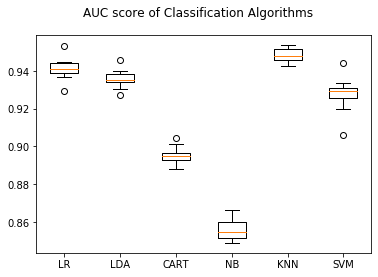

In [34]:
# Logistic regression model and KNN perfrom slightly better than others
fig = plt.figure()
fig.suptitle('AUC score of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [74]:
baseline_model = LogisticRegression()
baseline_model.fit(x_train_minmax, y_train_smote)
base_pred = baseline_model.predict(x_test_minmax)
print('Accuracy of baseline logistic regression classifier on test set: {:.2f}'
      .format(baseline_model.score(x_test_minmax, y_test)))
print('AUC score of baseline logistic regression classifier on test set: {:.2f}'
      .format(roc_auc_score(y_test,base_pred)))

Accuracy of baseline logistic regression classifier on test set: 0.87
AUC score of baseline logistic regression classifier on test set: 0.66


### KNN

AUC for k=  1 is 0.6456115359876612
AUC for k=  3 is 0.6927438718433131
AUC for k=  5 is 0.6966842791186365
AUC for k=  7 is 0.711242671300459
AUC for k=  9 is 0.7148604642548047
AUC for k=  11 is 0.719946522803579
AUC for k=  13 is 0.7269662467292364
AUC for k=  15 is 0.7320017915534318


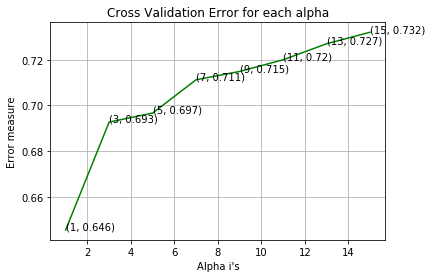

In [35]:
alpha = [x for x in range(1,17,2)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(x_train_minmax,y_train_smote)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(x_train_minmax,y_train_smote)
    predict_y = sig_clf.predict_proba(x_cv_minmax)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1])) 
    
for i in range(len(cv_auc_array)):
    print("AUC for k= ", alpha[i], "is", cv_auc_array[i])

fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [37]:
k_cfl=KNeighborsClassifier(n_neighbors=15)
k_cfl.fit(x_train_minmax,y_train_smote)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(x_train_minmax,y_train_smote)
    
predict_y = sig_clf.predict_proba(x_train_minmax)
print ('For values of best alpha = 15', "The train AUC is:",roc_auc_score(y_train_smote, predict_y[:,1]))
predict_y = sig_clf.predict_proba(x_cv_minmax)
print('For values of best alpha = 15', "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(x_test_minmax)
print('For values of best alpha = 15', "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

For values of best alpha = 15 The train AUC is: 0.962809101397021
For values of best alpha = 15 The cross validation AUC is: 0.7320017915534318
For values of best alpha = 15 The test AUC is: 0.7330257941944796


### Logistic Regression

AUC for k =  1e-05 is 0.761754375330444
AUC for k =  0.0001 is 0.7629976864714143
AUC for k =  0.001 is 0.7662056447403427
AUC for k =  0.01 is 0.7608646602615264
AUC for k =  0.1 is 0.7580951611219435
AUC for k =  1 is 0.7595189746387426
AUC for k =  10 is 0.7595923879184642
AUC for k =  100 is 0.7597378674452515
AUC for k =  1000 is 0.7600510525376412


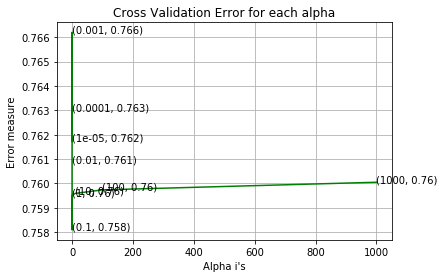

In [80]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i)
    logisticR.fit(x_train_minmax,y_train_smote)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid",class_weight='balanced')
    sig_clf.fit(x_train_minmax,y_train_smote)
    predict_y = sig_clf.predict_proba(x_cv_minmax)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [81]:
logisticR=LogisticRegression(penalty='l2',C=0.001,class_weight='balanced')
logisticR.fit(x_train_minmax,y_train_smote)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(x_train_minmax,y_train_smote)
    
predict_y = sig_clf.predict_proba(x_train_minmax)
print ('For values of best alpha = 15', "The train AUC is:",roc_auc_score(y_train_smote, predict_y[:,1]))
predict_y = sig_clf.predict_proba(x_cv_minmax)
print('For values of best alpha = 15', "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(x_test_minmax)
print('For values of best alpha = 15', "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

For values of best alpha = 15 The train AUC is: 0.8668660991639483
For values of best alpha = 15 The cross validation AUC is: 0.7662056447403427
For values of best alpha = 15 The test AUC is: 0.7572087953575322


## Implementing the model

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve

### Fitting the model with the best performance

In [103]:
# Model fitting
final_model = LogisticRegression(C=0.001,class_weight='balanced',penalty="l2")
final_model.fit(x_train_minmax, y_train_smote)

LogisticRegression(C=0.001, class_weight='balanced')

In [92]:
coef_table = pd.DataFrame(list(x_train_minmax.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",final_model.coef_.transpose())

In [93]:
coef_table

,0,Coefs
0,age,0.018402
1,education,-0.094919
2,housing,-0.372528
3,loan,-0.317736
4,month,0.012403
5,day_of_week,-0.139115
6,campaign,-0.064660
7,pdays,-0.298650
8,previous,0.000320
9,emp.var.rate,-0.470687


### Evaluation Matrics

In [105]:
# predict the test result and calculating the accuracy
y_pred = final_model.predict(x_test_minmax)
print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(final_model.score(x_test_minmax, y_test)))
print('AUC score of logistic regression classifier on test set: {:.2f}'
      .format(roc_auc_score(y_test,y_pred)))

# get precision and recal
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.78
AUC score of logistic regression classifier on test set: 0.71
              precision    recall  f1-score   support

           0       0.94      0.80      0.86     10650
           1       0.31      0.62      0.41      1542

    accuracy                           0.78     12192
   macro avg       0.62      0.71      0.64     12192
weighted avg       0.86      0.78      0.81     12192



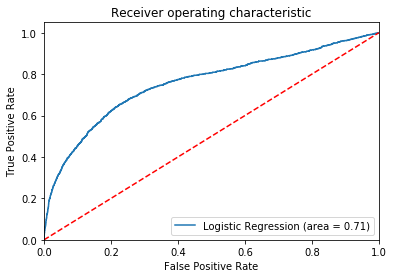

In [109]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, final_model.predict_proba(x_test_minmax)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()